In [325]:
import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta
from colorama import init, Fore, Back, Style


# Abrimos los ficheros 

In [326]:
# Abrimos el fichero:
path =(r"D:\Documentos D\02.- Datos Vueling\Flights Movement 2019-2022 MAR.xlsx")


# QUITAR # Para coger un fichero más pequeño
#path =(r"D:\Documentos D\02.- Datos Vueling\Flights Movement 2019-2022 MAR BORRAR.xlsx")
Hoja = 'FLT_2022'
df = pd.read_excel(path, sheet_name=Hoja)

df['Secuencia'] = df.groupby(['Flight Date', 'Tail'])['STD'].rank()
print(df[['Secuencia','STD', 'Departure']][0:4])

   Secuencia                 STD Departure
0        1.0 2022-01-01 07:40:00       BIO
1        2.0 2022-01-01 09:40:00       SVQ
2        3.0 2022-01-01 11:40:00       BIO
3        4.0 2022-01-01 13:30:00       SCQ


In [327]:
print(Style.BRIGHT +Fore.BLUE+'Hola' )
print('LLLLLL')

Hola
LLLLLL


In [328]:
print(Hoja)

FLT_2022


In [329]:
# Identifico los Aeropuertos principales.


path =(r"D:\Documentos D\02.- Datos Vueling\Flights Movement 2019-2022 MAR.xlsx")
df_Aeropuertos = pd.read_excel(path, sheet_name='Aeropuertos')
df_Aeropuertos = df_Aeropuertos.drop(['Borrar'], axis=1)

#df_Aeropuertos.head



# Identificacion de los principales Aeropuertos

In [330]:
#Agrupo por aeropuerto de Salida

df['MES'] = df['STD'].dt.month

df= pd.merge(df,df_Aeropuertos, left_on= 'Departure', right_on='Dep')

df= pd.merge(df,df_Aeropuertos, left_on= 'Arrival', right_on='Dep')


df= df.rename({'AeropuertoKey1_x': 'Aeropuerto_Key', 'AeropuertoKey1_y': 'AeropuertoKey1'}, axis=1)

df= df.sort_values(['Flight Date', 'Tail', 'STD'])
df= df.reset_index(drop=True)
borrarColumnas = ['Dep_x', 'Dep_y']
df = df.drop(borrarColumnas, axis=1)
df.head(2)


,Flight Number,Leg Code,Flight Date,Departure,Arrival,Tail,STD,STA,ATD,ATA,Total DLY Dep,Close Pax Door,Close Cargo Door,Open Cargo/Pax Door,Stand Dep,Stand Arr,Secuencia,MES,Aeropuerto_Key,AeropuertoKey1
0,2506,,2022-01-01,BIO,SVQ,EC-JSY,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:00:00,2022-01-01 09:20:00,40,2022-01-01 07:58:00.000,2022-01-01 07:31:00.000,2022-01-01 09:23:00.000,4,1,1.0,1,BIO,SVQ
1,2505,,2022-01-01,SVQ,BIO,EC-JSY,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 09:51:00,2022-01-01 11:09:00,11,2022-01-01 09:48:00.000,2022-01-01 09:46:00.000,2022-01-01 11:11:00.000,1,3,2.0,1,SVQ,BIO


# Calculo tiempo en vuelo 1

In [331]:
df.columns

Index(['Flight Number', 'Leg Code', 'Flight Date', 'Departure', 'Arrival',
       'Tail', 'STD', 'STA', 'ATD', 'ATA', 'Total DLY Dep', 'Close Pax Door',
       'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
       'Secuencia', 'MES', 'Aeropuerto_Key', 'AeropuertoKey1'],
      dtype='object')

In [332]:
# Calulo tiempo de vuelo teorico Real y error
df['DuracionVueloTeorico']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'] = (df['DuracionVueloReal'] - df['DuracionVueloTeorico']) #/  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo'].head(3)

0   -5.0
1   -7.0
2   -5.0
Name: E_Duracion_Vuelo, dtype: float64

# Tiempo Close Pax y Close Cargo Door

In [333]:
df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df['t_ClosePax'] =   (df['Close Pax Door'] - df['ATD']) /  np.timedelta64(1, 'm') 


df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])
df['t_Close_Cargo_Door'] = (df ['Close Cargo Door'] - df['ATD']) /  np.timedelta64(1, 'm') 

df['Close Pax Door'] =pd.to_datetime(df['Close Pax Door'])
df ['Close Cargo Door']=pd.to_datetime(df ['Close Cargo Door'])

df['t_Entre_Puertas'] = (df ['Close Cargo Door'] - df['Close Pax Door']) /  np.timedelta64(1, 'm') 
df[[ 't_ClosePax','t_Close_Cargo_Door', 't_Entre_Puertas'] ].head(4)

,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas
0,-2.0,-29.0,-27.0
1,-3.0,-5.0,-2.0
2,-2.0,-6.0,-4.0
3,-5.0,-17.0,-12.0


In [334]:
df ['Close Cargo Door']

0       2022-01-01 07:31:00
1       2022-01-01 09:46:00
2       2022-01-01 11:34:00
3       2022-01-01 13:06:00
4       2022-01-01 15:01:00
                ...        
60487   2022-05-23 00:00:00
60488   2022-05-23 00:00:00
60489   2022-05-23 00:00:00
60490   2022-05-23 00:00:00
60491   2022-05-23 00:00:00
Name: Close Cargo Door, Length: 60492, dtype: datetime64[ns]

In [335]:
df['t_Close_Cargo_Door']

0         -29.0
1          -5.0
2          -6.0
3         -17.0
4          -6.0
          ...  
60487    -540.0
60488    -811.0
60489    -959.0
60490   -1181.0
60491   -1287.0
Name: t_Close_Cargo_Door, Length: 60492, dtype: float64

In [336]:
# Estudio los trayectos.
condicion = [(df['Departure'] < df['Arrival']),  (df['Arrival'] < df['Departure'])]

valores = [  (df['Departure'] + '-' + df['Arrival']),  (df['Arrival'] + '-' + df['Departure'])]

df['Trayecto'] = np.select(condicion, valores ) 
df['Trayecto'].head(4)

#df5 = df.where('Departure' > 'Arrival',  'Departure' + 'Arrival',  'Arrival' +'Departure')

0    BIO-SVQ
1    BIO-SVQ
2    BIO-SCQ
3    BIO-SCQ
Name: Trayecto, dtype: object

In [337]:
# Creo la secuencia de vuelos de cada avión cada día

df['Secuencia'] = df.groupby(['Flight Date', 'Tail'])['STD'].rank()


df1=df
df1.head(2)



,Flight Number,Leg Code,Flight Date,Departure,Arrival,Tail,STD,STA,ATD,ATA,...,MES,Aeropuerto_Key,AeropuertoKey1,DuracionVueloTeorico,DuracionVueloReal,E_Duracion_Vuelo,t_ClosePax,t_Close_Cargo_Door,t_Entre_Puertas,Trayecto
0,2506,,2022-01-01,BIO,SVQ,EC-JSY,2022-01-01 07:40:00,2022-01-01 09:05:00,2022-01-01 08:00:00,2022-01-01 09:20:00,...,1,BIO,SVQ,85.0,80.0,-5.0,-2.0,-29.0,-27.0,BIO-SVQ
1,2505,,2022-01-01,SVQ,BIO,EC-JSY,2022-01-01 09:40:00,2022-01-01 11:05:00,2022-01-01 09:51:00,2022-01-01 11:09:00,...,1,SVQ,BIO,85.0,78.0,-7.0,-3.0,-5.0,-2.0,BIO-SVQ


In [338]:
'''
dfAeropuertos1 = pd.DataFrame(df['Departure'])
#dfAeropuertos1.insert(1,'counts',1)

dfAeropuertos1 = pd.DataFrame(dfAeropuertos1.value_counts()).reset_index()

dfAeropuertos1.columns = ['Dep', 'Count']
Total = dfAeropuertos1['Count'].sum()
print('Total= ', Total)

dfAeropuertos1['percent'] = (dfAeropuertos1['Count'] / 
                 dfAeropuertos1['Count'].sum()) * 100
dfAeropuertos1[:3]
'''

"\ndfAeropuertos1 = pd.DataFrame(df['Departure'])\n#dfAeropuertos1.insert(1,'counts',1)\n\ndfAeropuertos1 = pd.DataFrame(dfAeropuertos1.value_counts()).reset_index()\n\ndfAeropuertos1.columns = ['Dep', 'Count']\nTotal = dfAeropuertos1['Count'].sum()\nprint('Total= ', Total)\n\ndfAeropuertos1['percent'] = (dfAeropuertos1['Count'] / \n                 dfAeropuertos1['Count'].sum()) * 100\ndfAeropuertos1[:3]\n"

In [339]:
'''
filas1 = (dfAeropuertos1.iloc[:5])
filas = (dfAeropuertos1.iloc[:5])
filas = filas['Dep'].tolist()
filas.append('Otros')

filass = dfAeropuertos1.merge(filas1)
filass
'''

"\nfilas1 = (dfAeropuertos1.iloc[:5])\nfilas = (dfAeropuertos1.iloc[:5])\nfilas = filas['Dep'].tolist()\nfilas.append('Otros')\n\nfilass = dfAeropuertos1.merge(filas1)\nfilass\n"

In [340]:
#Agrupo por aeropuerto de Salida
'''
ggg= pd.merge(df,filas1, left_on= 'Departure', right_on='Dep')


ggg= ggg.sort_values(['STD', 'Tail'])


df= df.reset_index(drop=True)
print(df[['Secuencia','STD', 'Aeropuerto_Key1', 'Aeropuerto_Key2']][0:8])
#df= df.rename({'Aeropuerto_Key': 'Aeropuerto_Key1'}, axis=1)


#ggg= df.merge(filas1)
ggg[200:205]
'''

"\nggg= pd.merge(df,filas1, left_on= 'Departure', right_on='Dep')\n\n\nggg= ggg.sort_values(['STD', 'Tail'])\n\n\ndf= df.reset_index(drop=True)\nprint(df[['Secuencia','STD', 'Aeropuerto_Key1', 'Aeropuerto_Key2']][0:8])\n#df= df.rename({'Aeropuerto_Key': 'Aeropuerto_Key1'}, axis=1)\n\n\n#ggg= df.merge(filas1)\nggg[200:205]\n"

In [341]:
'''
df1 = pd.DataFrame(df, columns=['Departure'])
df1.insert(1,'counts',1)
df1 = df1.groupby('Departure').count().reset_index()
df1
'''

"\ndf1 = pd.DataFrame(df, columns=['Departure'])\ndf1.insert(1,'counts',1)\ndf1 = df1.groupby('Departure').count().reset_index()\ndf1\n"

In [342]:
# Analizo el retardo en el despegue:
def dibujarScatter( ejeX, ejeY):
    x= df1[ejeX]
    y = df1[ejeY]    
    ax = sns.scatterplot(x , y )



# Puntualidad media primer despegue en el 2019!

C:\Users\jmmat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


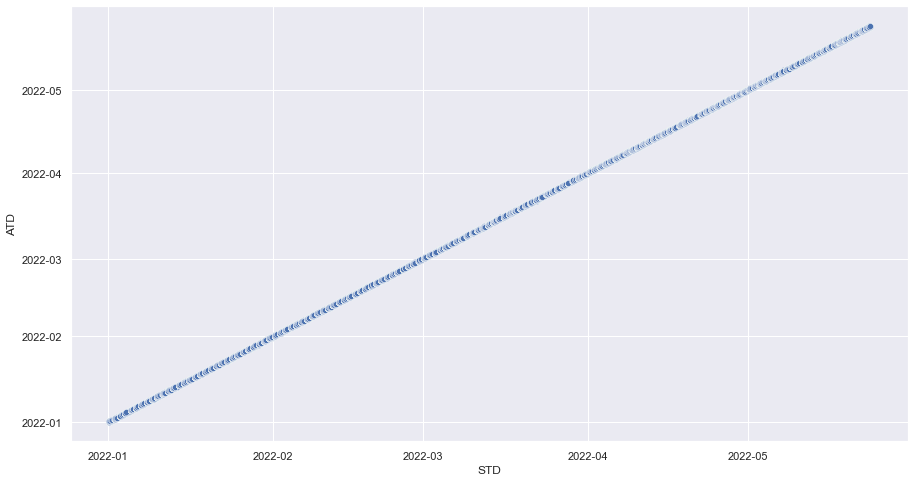

In [343]:
ax = sns.scatterplot( df1['STD'], df1['ATD'])

# Calculo error del primer despegue.

In [344]:
# Filtro primer despegue

vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]
print(df2[['Flight Date','Tail', 'Secuencia','STD']][0:8])


   Flight Date    Tail  Secuencia                 STD
0   2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00
6   2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00
12  2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00
16  2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00
21  2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00
24  2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00
29  2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00
33  2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00


In [345]:

#Calculo error despegue:
'''
vuelosPrimerDespegue= (df1['Secuencia']== 1)
df2 = df1[vuelosPrimerDespegue]

df2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')


#df2['E_Despegue']=df2['E_Despegue'].np.time

df2['E_Despegue'].head(8)
print(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])
#sns.histplot(data= df1.E_Despegue, kde= True)
'''

"\nvuelosPrimerDespegue= (df1['Secuencia']== 1)\ndf2 = df1[vuelosPrimerDespegue]\n\ndf2['E_Despegue'] = (df2['Date_ATD']- df2['Date_STD']) /  np.imedelta64(1, 'm')\n\n\n#df2['E_Despegue']=df2['E_Despegue'].np.time\n\ndf2['E_Despegue'].head(8)\nprint(df2[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])\n#sns.histplot(data= df1.E_Despegue, kde= True)\n"

In [346]:
#Calculo error primer despegue despegue:

df1['E_Despegue'] = (df1['ATD']- df1['STD']) /  np.timedelta64(1, 'm')

 
df1['E_Despegue'].head()
 

#print(df1['E_Despegue'][0], '-----', df1['Date_ATD'][0], '........', df1['Date_STD'][0])
#print(df1[['DATE','REG', 'E_Despegue', 'Date_ATD', 'Date_STD']][0:8])

print(df2[['Flight Date','Tail', 'Secuencia','STD', 'ATD']][0:8])

print('Media = ', df1['E_Despegue'].mean())

   Flight Date    Tail  Secuencia                 STD                 ATD
0   2022-01-01  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00
6   2022-01-01  EC-JZI        1.0 2022-01-01 07:30:00 2022-01-01 07:12:00
12  2022-01-01  EC-KDG        1.0 2022-01-01 14:20:00 2022-01-01 14:27:00
16  2022-01-01  EC-KDH        1.0 2022-01-01 07:50:00 2022-01-01 08:13:00
21  2022-01-01  EC-KDX        1.0 2022-01-01 17:35:00 2022-01-01 17:31:00
24  2022-01-01  EC-KLB        1.0 2022-01-01 05:25:00 2022-01-01 05:20:00
29  2022-01-01  EC-KLT        1.0 2022-01-01 07:30:00 2022-01-01 07:29:00
33  2022-01-01  EC-KMI        1.0 2022-01-01 12:05:00 2022-01-01 12:01:00
Media =  1.5895325001653111


<AxesSubplot:xlabel='E_Despegue', ylabel='Count'>

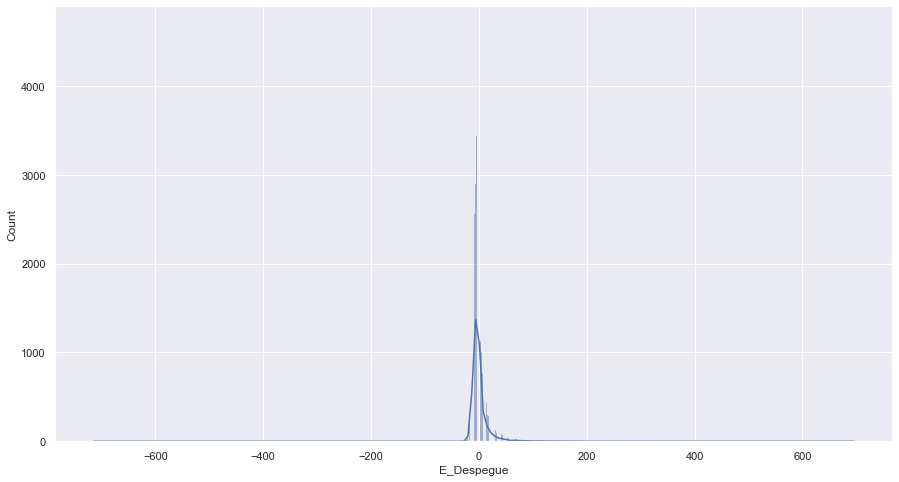

In [347]:
sns.histplot(data= df1.E_Despegue, kde= True)

# Vemos que hay mucha dispersion hay que filtrar los datos a:
## error de salida > 30 y < 30 y es el primer despegue


Media filtrada =  1.59 minutos


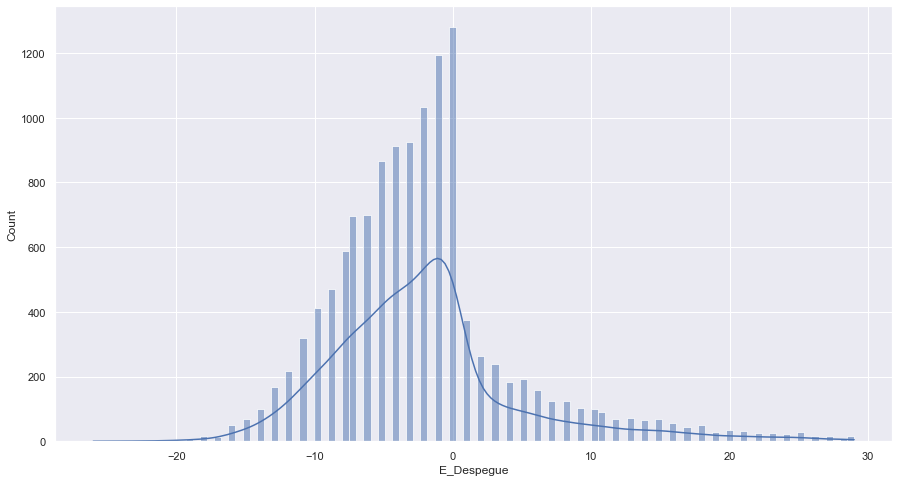

In [348]:
# Eliminar los outliers
df2=df1
dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['E_Despegue']< 30) & (df1['E_Despegue']> -30))

df2 = df2[dfEliminarOutliers]
sns.histplot(data= df2.E_Despegue, kde= True)
print()
print('Media filtrada = ', round(df1['E_Despegue'].mean(),2), 'minutos')
 

In [349]:
# Para saber la puntualidad solo de Barcelona
barcelonaPuntualidad = (df2['AeropuertoKey1']== 'BCN')

df2BarcelonaPuntualida = df2[barcelonaPuntualidad ]
df2BarcelonaPuntualida.head()
puntualidadBCN = round((df2BarcelonaPuntualida['E_Despegue'].mean()),2)
print(puntualidadBCN)

-2.27


Text(0.5, 1.0, 'Puntualidad principales aeropuertos:')

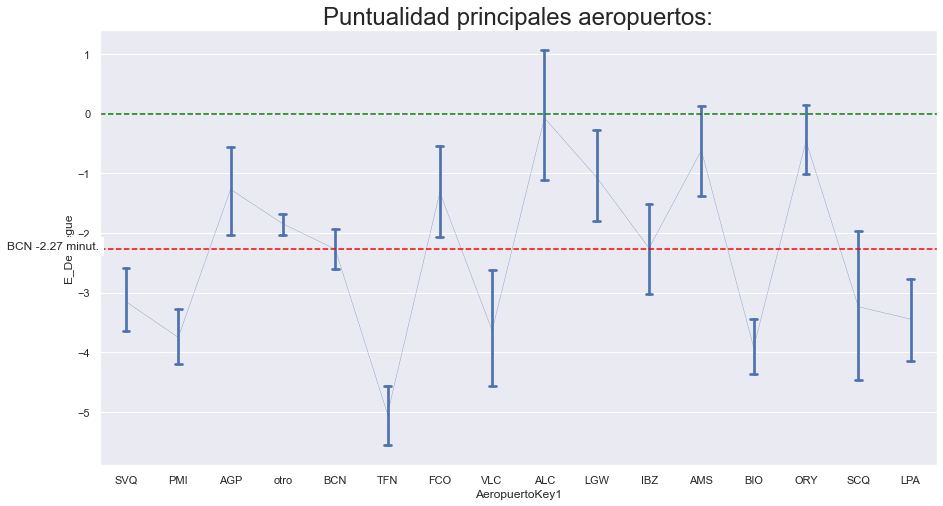

In [350]:
# Intervalos de Confianza por aeropuerto
sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_Despegue", data= df2, scale=.1, kind = "point", capsize=0.13)

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualidad principales aeropuertos:', fontsize = 24)

# tiempo 'Close Cargo Door'  -   'Close Pax'


Media filtrada =  -123.2 minutos


C:\Users\jmmat\AppData\Local\Temp/ipykernel_4652/2514581873.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[dfEliminarOutliers]


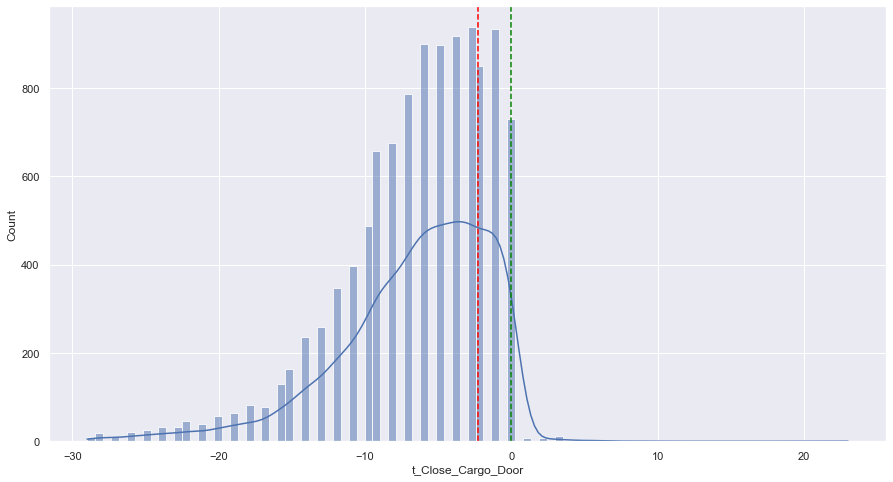

In [351]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_Close_Cargo_Door']< 30) & (df1['t_Close_Cargo_Door']> -30))

df2 = df2[dfEliminarOutliers]
#df2 = df2[dfEliminarOutliers]

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_Close_Cargo_Door'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# tiempo  'tiempo Close Pax'  -   'ATD'


Media filtrada =  -120.56 minutos


C:\Users\jmmat\AppData\Local\Temp/ipykernel_4652/2749738335.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[dfEliminarOutliers]


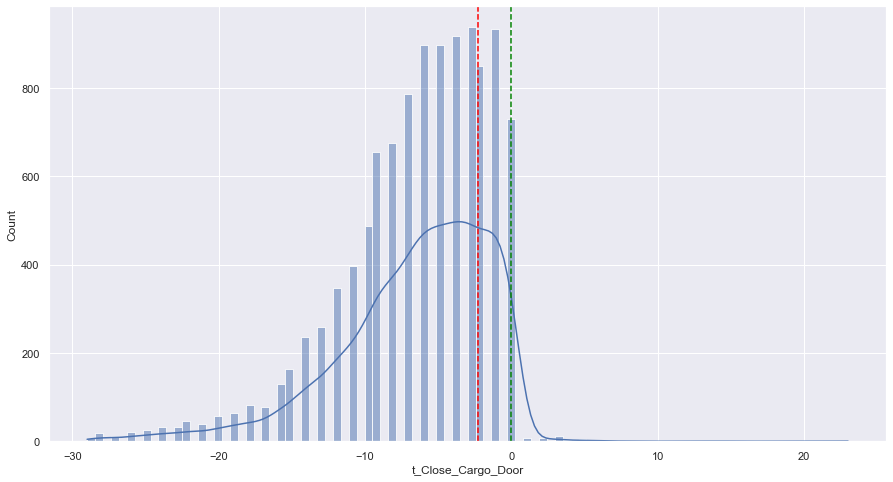

In [352]:
#t_Close_Cargo_Door

dfEliminarOutliers= ((df1['Secuencia']== 1) & (df1['t_ClosePax']< 30) & (df1['t_ClosePax']> -30))

df2 = df2[dfEliminarOutliers] 

ax=sns.histplot(data= df2.t_Close_Cargo_Door, kde= True)

media = round(df1['t_ClosePax'].mean(),2)
print()
print('Media filtrada = ', media , 'minutos')
 
ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


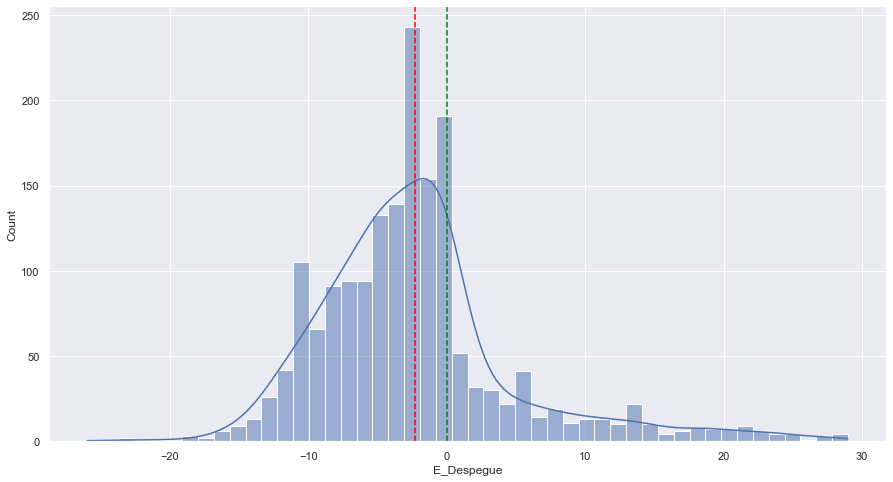

In [353]:
ax=sns.histplot(data= df2BarcelonaPuntualida.E_Despegue, kde= True)

ax.axvline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')


# creamos los LAGs

In [354]:
#Creamos los LAGs

df[f'lag_STD']= df['STD'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATD']= df['ATD'].shift(periods=-1)  

df[f'lag_STA']= df['STA'].shift(periods=-1)  
#adecuarFechas('DATE', 'lag_STD')
df[f'lag_ATA']= df['ATA'].shift(periods=-1) 


#df

# Tiempo en tierra de una avion despues primer salto
##df3 --> Calculo tiempo en tierra

In [355]:
df= df.sort_values(['Flight Date', 'Tail', 'STD'])



df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) /  np.timedelta64(1, 'm')
df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) /  np.timedelta64(1, 'm')


#df['T_teoricoTierra1'] = (df['lag_STD']- df['STA']) 
#df['T_RealTierra1'] = (df['lag_ATD']- df['ATA']) 
df['E_tierra1'] = df['T_RealTierra1'] -df['T_teoricoTierra1']


#df[f'lag_STD']= df['STD'].shift(periods=-1)  


df3=df
#selecionoSecuencia_1= (df['Secuencia']== 1)
#df3 = df[selecionoSecuencia_1]


#print(df3[['DATE','REG', 'Secuencia']][0:8])

print(df3[['Tail', 'Secuencia','STD', 'ATD', 'lag_STD', 'T_teoricoTierra1', 'E_tierra1']][0:4])
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')


     Tail  Secuencia                 STD                 ATD  \
0  EC-JSY        1.0 2022-01-01 07:40:00 2022-01-01 08:00:00   
1  EC-JSY        2.0 2022-01-01 09:40:00 2022-01-01 09:51:00   
2  EC-JSY        3.0 2022-01-01 11:40:00 2022-01-01 11:40:00   
3  EC-JSY        4.0 2022-01-01 13:30:00 2022-01-01 13:23:00   

              lag_STD  T_teoricoTierra1  E_tierra1  
0 2022-01-01 09:40:00              35.0       -4.0  
1 2022-01-01 11:40:00              35.0       -4.0  
2 2022-01-01 13:30:00              40.0       -2.0  
3 2022-01-01 15:15:00              40.0       16.0  

Media filtrada =  5.48 minutos


In [356]:
# Retraso
df['Puntualidad1'] = (df['ATA'] - df['STA']) /  np.timedelta64(1, 'm') 
df['Puntualidad11'].head(3)

KeyError: 'Puntualidad11'

# Creamos los LAG siguientes saltos

In [ ]:
df.columns

In [ ]:
#Creamos los LAGs
df[f'E_Despegue2']= df['E_Despegue'].shift(periods=-1) 
df[f'E_Despegue3']= df['E_Despegue'].shift(periods=-2) 

df[f'E_Duracion_Vuelo2']= df['E_Duracion_Vuelo'].shift(periods=-1) 
df[f'E_Duracion_Vuelo3']= df['E_Duracion_Vuelo'].shift(periods=-2) 

df[f'E_tierra2']= df['E_tierra1'].shift(periods=-1) 
df[f'E_tierra3']= df['E_tierra1'].shift(periods=-2) 

df[f'Aeropuerto_Key2']= df['Aeropuerto_Key'].shift(periods=-1) 
df[f'Aeropuerto_Key3']= df['Aeropuerto_Key'].shift(periods=-2) 


df[f'Puntualidad2']= df['Puntualidad1'].shift(periods=-1) 
df[f'Puntualidad3']= df['Puntualidad1'].shift(periods=-2) 


df[f'E_Despegue_Total'] = df[f'E_Despegue'] + df[f'E_Despegue2'] + df[f'E_Despegue3']
df[f'E_Duracion_Vuelo_Total'] = df[f'E_Duracion_Vuelo'] + df[f'E_Duracion_Vuelo2'] + df[f'E_Duracion_Vuelo3']  
df[f'E_tierra_Total'] = df[f'E_tierra1'] + df[f'E_tierra2'] + df[f'E_tierra3']    

df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 


# Estudio en Tierra primer aterrizaje.

In [ ]:
sns.histplot(data= df3.E_tierra1, kde= True)

In [ ]:
# Eliminar los outliers
#df2=df1
dfEliminarOutliers= ((df3['Secuencia']== 1) & (df3['E_tierra1']< 30) & (df3['E_tierra1']> -30))

df3 = df3[dfEliminarOutliers]
ax = sns.histplot(data= df3.E_tierra1, kde= True)
print()
print('Media filtrada = ', round(df3['E_tierra1'].mean(),2), 'minutos')

media = round(df3['E_tierra1'].mean(),2)

ax.axvline(media, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axvline(0, color="green", linestyle = '--')

In [ ]:
# Crear Subgrupos de tiempo de boarding:
'''
df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000,0, 41, 46,51,60,100000], labels=['NEGATIVOS',
                                                                                              '1.- >0 & <=41',
                                                                                              '2.- >42 & <=46',
                                                                                              '3.- >47 & <51',
                                                                                              '4.- >52 & <60',
                                                                                              '5.- >61'])
'''

df3['t_boarding'] = pd.cut(df3['T_teoricoTierra1'], bins = [ -9000, 0, 39, 40, 45, 50, 55, 60, 100000], labels=['NEGATIVOS',
                                                                                                          
                                                                                                          '1.- <40',
                                                                                                          '2.- 40',
                                                                                                          '3.- 45',
                                                                                                          '4.- 50',
                                                                                                          '5.- 55',
                                                                                                          '6.- 60', 
                                                                                                          '7.- >60'])
df3[['T_teoricoTierra1', 't_boarding']].head(5)

In [ ]:
# Para saber error primer boarding solo de Barcelona

barcelonaTierra = (df3['Arrival']== 'BCN')

df4BarcelonaTierra = df3[barcelonaTierra]
df4BarcelonaTierra .head()
df4BarcelonaTierraError  = round((df4BarcelonaTierra ['E_tierra1'].mean()),2)
print('Error en el aterrizaje de Barcelona ', df4BarcelonaTierraError)

In [ ]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='AeropuertoKey1', y = "E_tierra1", data= df3, scale=.1, kind = "point", capsize=0.13)

ax.axhline(df4BarcelonaTierraError , color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error primer t. BOARDING principales aeropuertos:', fontsize = 24)

In [ ]:
df4BarcelonaTierra .head()

In [ ]:
# Contabilizar elementos por grupo de boarding
df5= df3['t_boarding'].value_counts()
#df5['t_boarding']= df5.sort_values('t_boarding')
df5.head()
df5

In [ ]:
# Intervalos de Confianza por grupo de boarding.

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='t_boarding', y = "E_tierra1", data= df4BarcelonaTierra, scale=.1, kind = "point", capsize=0.13)

#ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN "+ str(df4BarcelonaTierraError) + ' minut.'
ax.text(df4BarcelonaTierraError  ,df4BarcelonaTierraError  , textoBCN, backgroundcolor='w')

ax.set_title('Error boarding BCN:', fontsize = 24)

# Guardar a EXCEL

In [ ]:
# Borro las columnas que no me interesan.

'''
borrarColumnas = ['C1', 'DLY1', 'C2', 'DLY2',
       'C3', 'DLY3', 'C4', 'DLY4', 'C2A', 'DLY2A', 'C1Des', 'C2Des', 'C3Des',
       'C4Des', 'CADes', 'ID', 'STAND', 'MSN']
df3 = df3.drop(borrarColumnas, axis=1)
'''

In [ ]:
df3.columns

In [ ]:
# Guardar excel

#df3.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_" + Hoja + ".xlsx")
print()
print('Guardado fichero : Vueling_Python.xlsx')
print()

# Estudio de la duracion del vuelo

In [ ]:
# Identifico los Aeropuertos principales.


path =(r"D:\Documentos D\02.- Datos Vueling\Vueling_Trayectos_Duracion_Vuelo.xlsx")
df_Trayectos = pd.read_excel(path, sheet_name='Trayectos')
df_Trayectos = df_Trayectos.drop(['Borrar'], axis=1)
df_Trayectos.head(3)

In [ ]:
# Solo escojo los datos que necesito para le calculo volando

df.columns
df5= df
borrarColumnas = ['Leg Code', 'Total DLY Dep', 'Close Pax Door',
       'Close Cargo Door', 'Open Cargo/Pax Door', 'Stand Dep', 'Stand Arr',
        'lag_STD', 'lag_ATD', 
       
       't_ClosePax', 't_Close_Cargo_Door',
        'T_teoricoTierra1',
       'T_RealTierra1', 't_Entre_Puertas']

df5 = df5.drop(borrarColumnas, axis=1)
df5.head(1)

In [ ]:
#Agrupo por Trayecto

df5= pd.merge(df5,df_Trayectos, left_on= 'Trayecto', right_on='Trayecto')





df5= df5.sort_values(['Flight Date', 'Tail', 'STD'])
df5= df5.reset_index(drop=True)
#borrarColumnas = ['Dep_x', 'Dep_y']
#df5 = df5.drop(borrarColumnas, axis=1)
df5.head(3)


In [ ]:
dfEliminarOutliers= (df5['Secuencia']== 1) 

df5 = df5[dfEliminarOutliers]


df5.to_excel(r"D:\Documentos D\02.- Datos Vueling\Vueling_Python_MAR_Vuelo_" + Hoja + ".xlsx")
print()
print('Guardado fichero : Vueling_Python_MAR_Vuelo.xlsx')
print()